In [4]:
from hardening import EPMaterial
import numpy as np
import matplotlib.pyplot as plt

## Elastiplastic Material

This notebook contains a tutorial on how to create an elastoplastic material using either the isotropic model, the kinetic model, or a user-defined model. This is accomplished by the ```EPMaterial``` class in ```hardening.py```. Throughout each of these examples we'll be using the following strain curve:

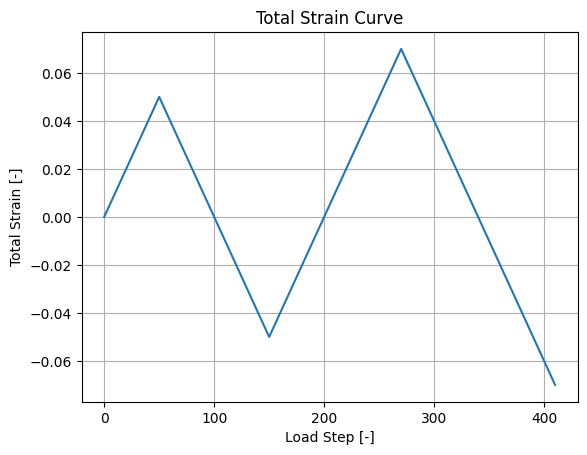

In [5]:
dstrainlist = [0] + [0.001]*50 + [-0.001]*100 + [0.001]*(50+70) + [-0.001]*140
strainlist = np.cumsum(dstrainlist)
plt.plot(strainlist)
plt.xlabel('Load Step [-]')
plt.ylabel('Total Strain [-]')
plt.grid(True)
plt.title('Total Strain Curve')
plt.show()

## Example 1: Isotropic Material

Isotropic hardening's behavior is defined by the yield strength of the material adjusting to the maximum stress it has reached.

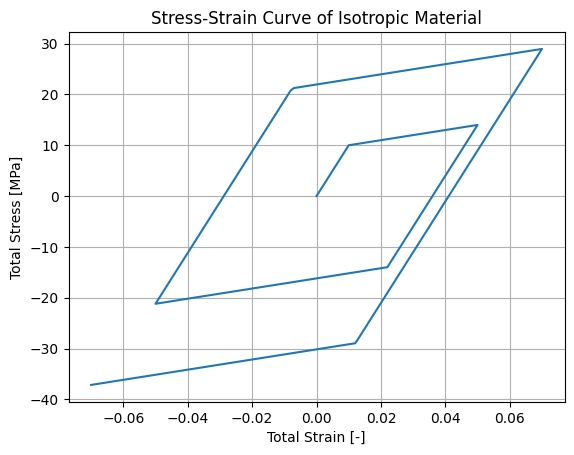

In [6]:
# Defines a material with isotropic hardening
isomat = EPMaterial(1000, 100, 'T', 10, 'I')

# Defines the state list
N = len(dstrainlist)
statelist = np.zeros((N, 5))

# Iterates through the changes in strain and outputs the results
for i in range(N):
    isomat.update_state(dstrainlist[i])
    statelist[i, :] = isomat.return_state()

# Plots the final stress-strain curve for our deformation
plt.plot(statelist[:, 1], statelist[:, 0])
plt.xlabel('Total Strain [-]')
plt.ylabel('Total Stress [MPa]')
plt.grid(True)
plt.title('Stress-Strain Curve of Isotropic Material')
plt.show()

## Example 2: Kinetic Hardening

Kinetic hardening's behavior differs from isotropic hardening in that the center of the yield stress bounds shifts with plastic deformation. This model can also be specified as a default by the class.

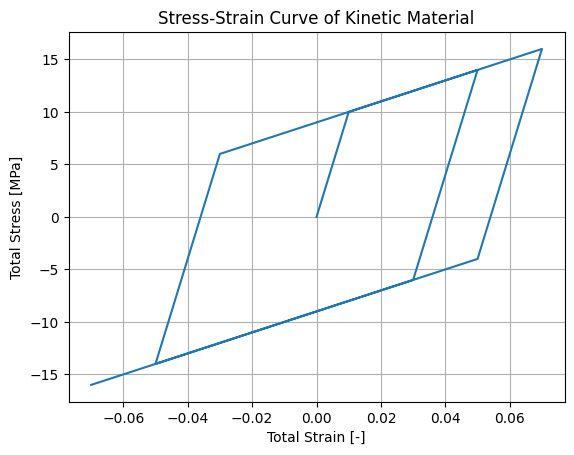

In [7]:
# Defines a material with isotropic hardening
kinmat = EPMaterial(1000, 100, 'T', 10, 'K')

# Defines the state list
N = len(dstrainlist)
statelist = np.zeros((N, 5))

# Iterates through the changes in strain and outputs the results
# Iterates through the changes in strain and outputs the results
for i in range(N):
    kinmat.update_state(dstrainlist[i])
    statelist[i, :] = kinmat.return_state()

# Plots the final stress-strain curve for our deformation
plt.plot(statelist[:, 1], statelist[:, 0])
plt.xlabel('Total Strain [-]')
plt.ylabel('Total Stress [MPa]')
plt.grid(True)
plt.title('Stress-Strain Curve of Kinetic Material')
plt.show()

## Example 3: Custom Hardening

This class also allows for defining a custom model. Let's see if we can define a class that's a mix of the two so half of the deformation changes the yield strength and the other half changes the yield center.

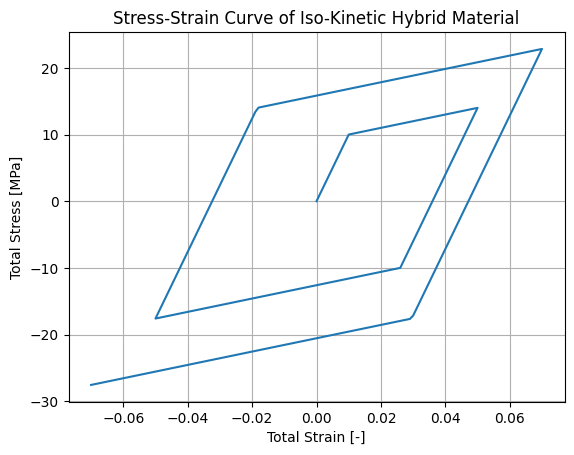

In [8]:
def custom(self, state):
    # Calculates changes in strain, stress, and yield center
    dir = np.sign(self.stress - self.alpha)
    dstrain = state/(self.E + self.H)
    dstress = -dir*self.E*dstrain
    dyield = self.H*dstrain/2
    dalpha = dir*self.H*dstrain/2
    # Updates fields in passed class
    self.stress += dstress
    self.pstrain += dstrain
    self.Y0 += dyield
    self.alpha += dalpha

# Defines a material with isotropic hardening
custommat = EPMaterial(1000, 100, 'T', 10, custom)

# Defines the state list
N = len(dstrainlist)
statelist = np.zeros((N, 5))

# Iterates through the changes in strain and outputs the results
# Iterates through the changes in strain and outputs the results
for i in range(N):
    custommat.update_state(dstrainlist[i])
    statelist[i, :] = custommat.return_state()

# Plots the final stress-strain curve for our deformation
plt.plot(statelist[:, 1], statelist[:, 0])
plt.xlabel('Total Strain [-]')
plt.ylabel('Total Stress [MPa]')
plt.grid(True)
plt.title('Stress-Strain Curve of Iso-Kinetic Hybrid Material')
plt.show()

## Example 4: Plastic Modulus

This class also supports specifying the plastic modulus instead of the elastic modulus

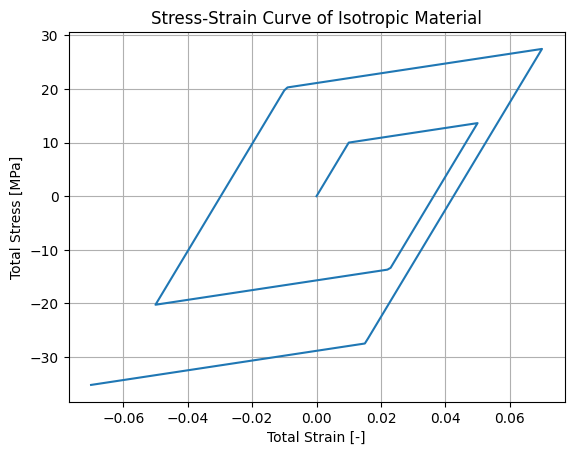

In [9]:
# Defines a material with isotropic hardening
plasticmat = EPMaterial(1000, 100, 'P', 10, 'I')

# Defines the state list
N = len(dstrainlist)
statelist = np.zeros((N, 5))

# Iterates through the changes in strain and outputs the results
# Iterates through the changes in strain and outputs the results
for i in range(N):
    plasticmat.update_state(dstrainlist[i])
    statelist[i, :] = plasticmat.return_state()

# Plots the final stress-strain curve for our deformation
plt.plot(statelist[:, 1], statelist[:, 0])
plt.xlabel('Total Strain [-]')
plt.ylabel('Total Stress [MPa]')
plt.grid(True)
plt.title('Stress-Strain Curve of Isotropic Material')
plt.show()

## Example 5: Pre-Stressing

You can also pre-set certain parameters in the material such as stress or the yield center.

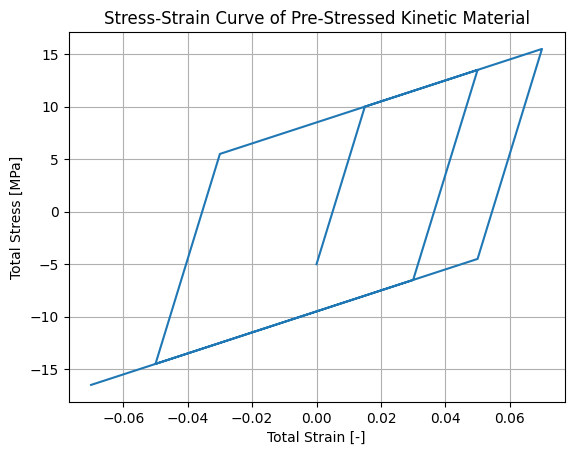

In [10]:
# Defines a material with isotropic hardening
premat = EPMaterial(1000, 100, 'T', 10, 'K', stress=-5)

# Defines the state list
N = len(dstrainlist)
statelist = np.zeros((N, 5))

# Iterates through the changes in strain and outputs the results
for i in range(N):
    premat.update_state(dstrainlist[i])
    statelist[i, :] = premat.return_state()

# Plots the final stress-strain curve for our deformation
plt.plot(statelist[:, 1], statelist[:, 0])
plt.xlabel('Total Strain [-]')
plt.ylabel('Total Stress [MPa]')
plt.grid(True)
plt.title('Stress-Strain Curve of Pre-Stressed Kinetic Material')
plt.show()

In [22]:
# Basic test of isotropic stress-strain curve
strain = [0, 0, 0.0075, 0.03, 0.05, 0]
dstrain = np.diff(strain)
E = 1000
Et = 100
Y0 = 10
isomat = EPMaterial(E, Et, 't', Y0, 'i')
statelist = np.zeros((5, 5))
for i in range(5):
    isomat.update_state(dstrain[i])
    statelist[i, :] = isomat.return_state()

print(statelist)

[[ 0.00e+00  0.00e+00  0.00e+00  1.00e+01  0.00e+00]
 [ 7.50e+00  7.50e-03  0.00e+00  1.00e+01  0.00e+00]
 [ 1.20e+01  3.00e-02  1.80e-02  1.20e+01  0.00e+00]
 [ 1.40e+01  5.00e-02  3.60e-02  1.40e+01  0.00e+00]
 [-1.62e+01  0.00e+00  5.58e-02  1.62e+01  0.00e+00]]


In [13]:
dstrain

array([ 0.075, -0.045,  0.02 , -0.05 ])

In [41]:
correct = np.array([
        [0, 0, 0, 10, 0],
        [7.5, 0.0075, 0, 10, 0],
        [12, 0.03, 0.018, 12, 0],
        [14, 0.05, 0.036, 14, 0],
        [-16.2, 0, 0.0558, 16.2, 0]
    ])

In [44]:
np.linalg.norm(correct - statelist) <= 10e-9

True

In [39]:
statelist

array([[ 0.00e+00,  0.00e+00,  0.00e+00,  1.00e+01,  0.00e+00],
       [ 7.50e+00,  7.50e-03,  0.00e+00,  1.00e+01,  0.00e+00],
       [ 1.20e+01,  3.00e-02,  1.80e-02,  1.20e+01,  0.00e+00],
       [ 1.40e+01,  5.00e-02,  3.60e-02,  1.40e+01,  0.00e+00],
       [-1.62e+01,  0.00e+00,  5.58e-02,  1.62e+01,  0.00e+00]])

In [45]:
strain = [0, 0, 0.0075, 0.03, 0.05, 0]
dstrain = np.diff(strain)
def custom(self, state):
    # Calculates changes in strain, stress, and yield center
    dir = np.sign(self.stress - self.alpha)
    dstrain = state/(self.E + self.H)
    dstress = -dir*self.E*dstrain
    dyield = self.H*dstrain/2
    dalpha = dir*self.H*dstrain/2
    # Updates fields in passed class
    self.stress += dstress
    self.pstrain += dstrain
    self.Y0 += dyield
    self.alpha += dalpha

# Defines a material with isotropic hardening
custommat = EPMaterial(1000, 100, 'T', 10, custom)

# Defines the state list
N = len(dstrain)
statelist = np.zeros((N, 5))

# Iterates through the changes in strain and outputs the results
# Iterates through the changes in strain and outputs the results
for i in range(N):
    custommat.update_state(dstrain[i])
    statelist[i, :] = custommat.return_state()